In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
# from google.colab import files
# import pandas as pd

# # Выберите файл на вашем компьютере и загрузите его в Colab
# uploaded = files.upload()

# # Прочитайте CSV-файл в DataFrame с использованием pandas
# df = pd.read_csv(list(uploaded.keys())[0])

df = pd.read_csv('titanic_train.csv')
# Выведите первые несколько строк DataFrame
df.head()

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
1,1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
2,2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
3,3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
4,4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0


In [4]:
df.describe()

,Unnamed: 0,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000,712.000000
mean,355.500000,448.234551,2.330056,29.498846,0.553371,0.379213,32.586276,0.376404
std,205.680983,256.731423,0.824584,14.500059,1.176404,0.791669,51.969529,0.484824
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,177.750000,224.750000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,355.500000,453.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,533.250000,673.500000,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000
max,711.000000,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
df


,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
1,1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
2,2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
3,3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
4,4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,707,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,1
708,708,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0
709,709,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0
710,710,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,1


In [6]:
df2 = df.drop(columns=['Cabin', 'Unnamed: 0'])
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,S,0
1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,S,0
2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,S,0
3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,S,0
4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,S,0
...,...,...,...,...,...,...,...,...,...,...,...
707,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,S,1
708,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,S,0
709,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,S,0
710,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,S,1


/tmp/ipykernel_12648/1235089975.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


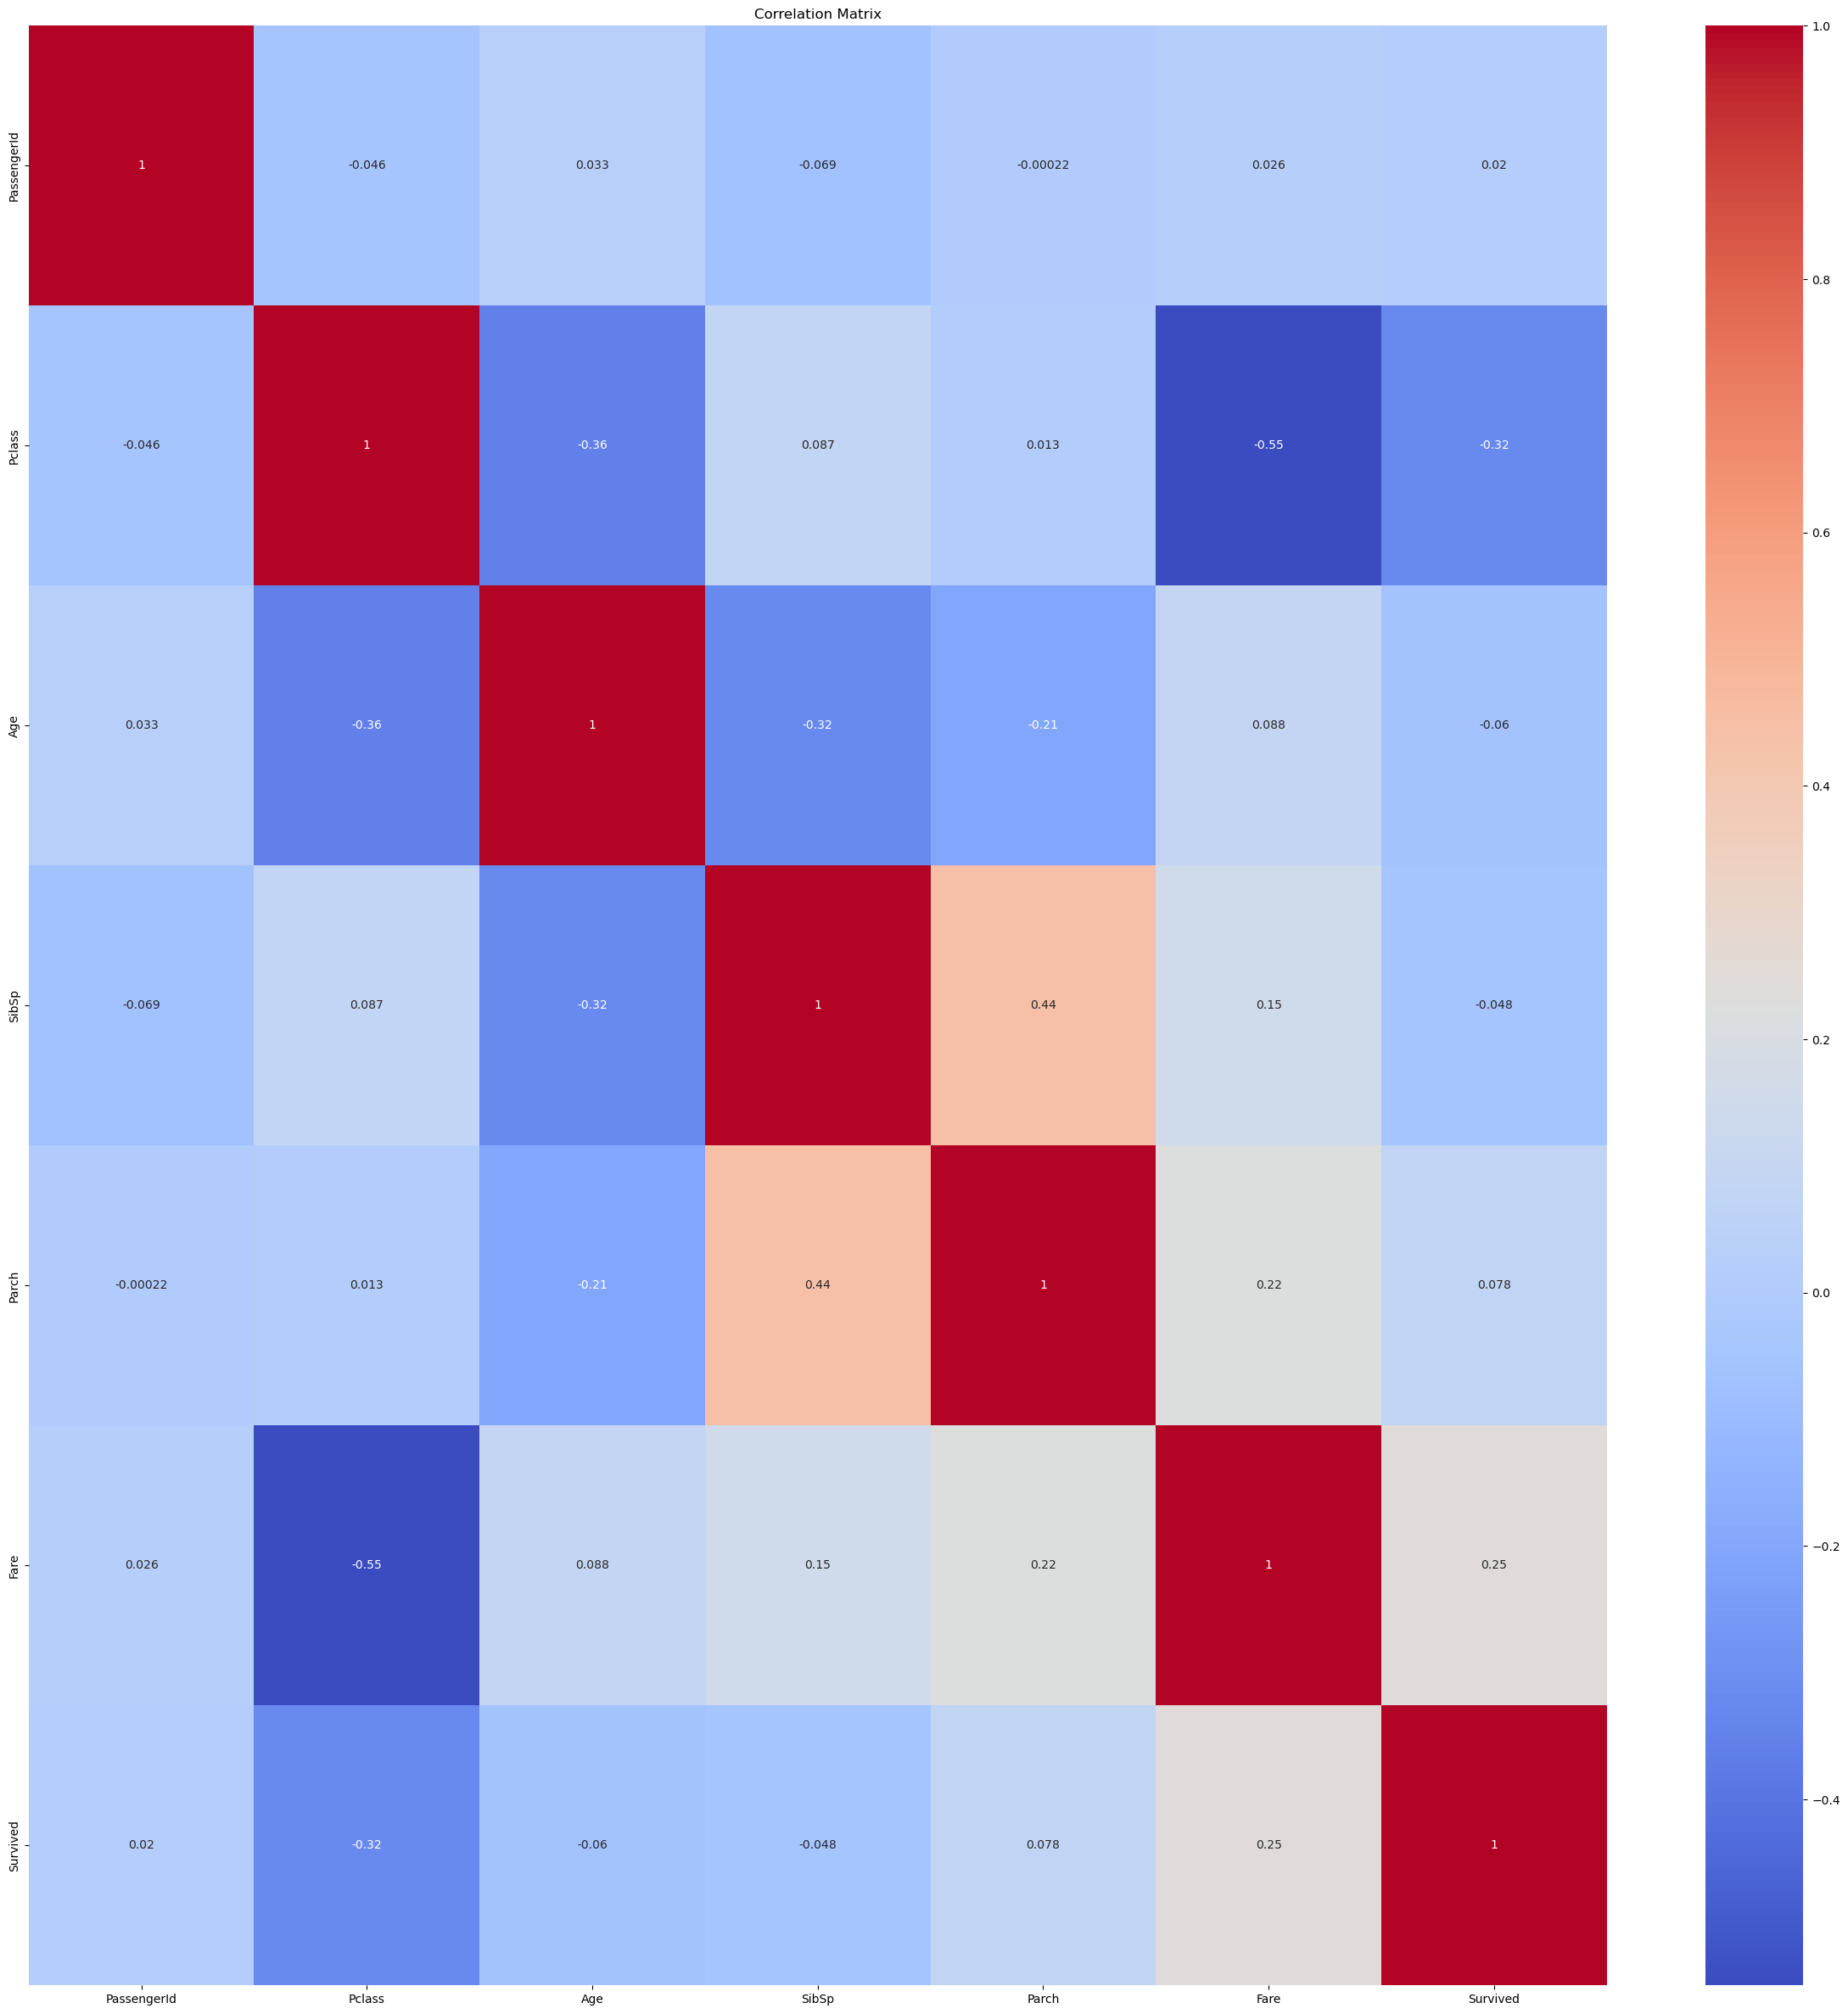

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Построение корреляционной матрицы
correlation_matrix = df2.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
#убираем все не релевантные значения в столбце Age

df2['Age'] = df2['Age'].interpolate()
df2 = df2.dropna()
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,S,0
1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,S,0
2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,S,0
3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,S,0
4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,S,0
...,...,...,...,...,...,...,...,...,...,...,...
707,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,S,1
708,271,1,"Cairns, Mr. Alexander",male,31.0,0,0,113798,31.0000,S,0
709,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,S,0
710,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,S,1


In [9]:
# преобразуем категориальные переменные в числовые в столбце "Пол"
label_encoder = LabelEncoder()
df2['Sex'] = label_encoder.fit_transform(df2['Sex'])
df2

/tmp/ipykernel_12648/3478258866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sex'] = label_encoder.fit_transform(df2['Sex'])


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,332,1,"Partner, Mr. Austen",1,45.5,0,0,113043,28.5000,S,0
1,734,2,"Berriman, Mr. William John",1,23.0,0,0,28425,13.0000,S,0
2,383,3,"Tikkanen, Mr. Juho",1,32.0,0,0,STON/O 2. 3101293,7.9250,S,0
3,705,3,"Hansen, Mr. Henrik Juul",1,26.0,1,0,350025,7.8542,S,0
4,814,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.0,4,2,347082,31.2750,S,0
...,...,...,...,...,...,...,...,...,...,...,...
707,107,3,"Salkjelsvik, Miss. Anna Kristine",0,21.0,0,0,343120,7.6500,S,1
708,271,1,"Cairns, Mr. Alexander",1,31.0,0,0,113798,31.0000,S,0
709,861,3,"Hansen, Mr. Claus Peter",1,41.0,2,0,350026,14.1083,S,0
710,436,1,"Carter, Miss. Lucile Polk",0,14.0,1,2,113760,120.0000,S,1


**Предсказание**


In [10]:
X = df2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df2['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Логистическая регрессия
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

y_pred1 = logistic_regression_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
# Вывод матрицы ошибок и отчета о классификации
print(f"Accuracy: {accuracy:.2f}")
print("F1:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.80
F1: 0.7741935483870969
Confusion Matrix:
 [[66 11]
 [17 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.81      0.74      0.77        65

    accuracy                           0.80       142
   macro avg       0.80      0.80      0.80       142
weighted avg       0.80      0.80      0.80       142



In [12]:
#Метод случайного леса
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred2 = random_forest_model.predict(X_test)

# Оценка точности
accuracy2 = accuracy_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
print("F1:", f12)
print(f"Accuracy: {accuracy2:.2f}")

# Вывод матрицы ошибок и отчета о классификации
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

F1: 0.7000000000000001
Accuracy: 0.75
Confusion Matrix:
 [[64 13]
 [23 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        77
           1       0.76      0.65      0.70        65

    accuracy                           0.75       142
   macro avg       0.75      0.74      0.74       142
weighted avg       0.75      0.75      0.74       142



In [13]:
#Градиентный бустинг
gradboost = GradientBoostingClassifier(random_state=0)
gradboost.fit(X_train, y_train)
y_pred3 = gradboost.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3)
print("Accuracy:", accuracy3)
print("F1:", f13)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 0.7816901408450704
F1: 0.7256637168141593
Confusion Matrix:
 [[70  7]
 [24 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        77
           1       0.85      0.63      0.73        65

    accuracy                           0.78       142
   macro avg       0.80      0.77      0.77       142
weighted avg       0.79      0.78      0.78       142



In [14]:
#K-Nearest Neighbors
k_neighbors_model = KNeighborsClassifier(n_neighbors=3)
k_neighbors_model.fit(X_train, y_train)
y_pred4 = k_neighbors_model.predict(X_test)
f14 = f1_score(y_test, y_pred4)

# Оценка точности
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4:.2f}")
print("F1:", f14)
# Вывод матрицы ошибок и отчета о классификации
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print("\nClassification Report:\n", classification_report(y_test, y_pred4))

Accuracy: 0.64
F1: 0.5714285714285714
Confusion Matrix:
 [[57 20]
 [31 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.74      0.69        77
           1       0.63      0.52      0.57        65

    accuracy                           0.64       142
   macro avg       0.64      0.63      0.63       142
weighted avg       0.64      0.64      0.64       142



# Валидация (Эрдэни)

In [25]:
df_true = pd.read_csv("titanic_y_true178.csv")
y_true = df_true['Survived'].values
y_true

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1])

In [20]:
df_test = pd.read_csv('titanic_test.csv')
df_test = df_test.drop(columns=['Cabin', 'Unnamed: 0'])
df_test['Age'] = df_test['Age'].interpolate()
df_test = df_test.dropna()
df_test['Sex'] = label_encoder.transform(df_test['Sex'])
X2 = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [23]:
y_pred_test = logistic_regression_model.predict(X2)

In [26]:
accuracy_score(y_true, y_pred_test)

0.8089887640449438